<a href="https://colab.research.google.com/github/JapneetDataDeveloper/Improve_Customer_Satisfaction_Recommendation/blob/master/Improve_customer_satisfaction_with_cineplex_entertainment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
!pip install google-play-scraper


In [ ]:
from google_play_scraper import Sort, reviews_all
cineplex_google_play_store_reviews = reviews_all(
    'com.fivemobile.cineplex',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='ca', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)



In [ ]:
df_overall_reviews = pd.DataFrame(np.array(cineplex_google_play_store_reviews),columns=['review'])
df_overall_reviews = df_overall_reviews.join(pd.DataFrame(df_overall_reviews.pop('review').tolist()))
df_overall_reviews=df_overall_reviews[df_overall_reviews['at'].dt.year==2022]
df_overall_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
410,a2af1f8b-79c4-4360-817c-349ba4a318ec,Jeff Korejbo,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible. All I get is An unexpected error has...,1,0,7.6.1.0,2022-12-31 21:56:47,None,NaT,7.6.1.0
411,1f43c941-8f30-4815-a761-453e8fc423d4,Frank S,https://play-lh.googleusercontent.com/a-/ALV-U...,"This app is brutal, I entered a new account pa...",1,0,7.6.1.0,2022-12-31 20:20:21,None,NaT,7.6.1.0
412,7da143b7-e5ec-4840-84be-6b3ef505d0db,Mike M,https://play-lh.googleusercontent.com/a-/ALV-U...,Awful experience. Thought tech was supposed to...,1,0,7.6.1.0,2022-12-31 14:51:49,None,NaT,7.6.1.0
413,2f7f63d9-2b07-4886-808b-447f4a0e4fee,Steven L,https://play-lh.googleusercontent.com/a-/ALV-U...,Adding gift cards doesn't work it inputs two d...,1,0,7.6.1.0,2022-12-31 04:31:36,None,NaT,7.6.1.0
414,181c13b1-925f-4ba6-93cf-957a40df0a09,Tomas Cage,https://play-lh.googleusercontent.com/a-/ALV-U...,Trash app,1,0,None,2022-12-30 15:17:22,None,NaT,None


In [ ]:
pip install nltk

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df_overall_reviews.dropna(subset=['content'],inplace=True)

In [ ]:
# create preprocess_text function
import re
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    return processed_text
# apply the function df

df_overall_reviews['content'] = df_overall_reviews['content'].apply(preprocess_text)
df_overall_reviews['content'].map(lambda x: re.sub('[,\.!?]', '', x))

410    terrible  get unexpected error occurred  up-to...
411    app brutal  entered new account password  veri...
412    awful experience  thought tech supposed make l...
413    adding gift cards n't work inputs two digits k...
414                                            trash app
                             ...                        
753    worst experience ever app store  app multitude...
754    need fix cineplex store app  n't letting log e...
755    app used good n't even know right location giv...
756        think maybe could fix app actually buy ticket
757                            cards dont work half time
Name: content, Length: 348, dtype: object

In [ ]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()
# create get_sentiment function
def get_sentiment(text):
  scores = analyzer.polarity_scores(text)
  sentiment = 1 if scores['pos'] > 0 else 0
  return sentiment
# apply get_sentiment function

df_overall_reviews['sentiment'] = df_overall_reviews['content'].apply(get_sentiment)

df_overall_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
410,a2af1f8b-79c4-4360-817c-349ba4a318ec,Jeff Korejbo,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible . get unexpected error occurred . up-...,1,0,7.6.1.0,2022-12-31 21:56:47,None,NaT,7.6.1.0,0
411,1f43c941-8f30-4815-a761-453e8fc423d4,Frank S,https://play-lh.googleusercontent.com/a-/ALV-U...,"app brutal , entered new account password , ve...",1,0,7.6.1.0,2022-12-31 20:20:21,None,NaT,7.6.1.0,1
412,7da143b7-e5ec-4840-84be-6b3ef505d0db,Mike M,https://play-lh.googleusercontent.com/a-/ALV-U...,awful experience . thought tech supposed make ...,1,0,7.6.1.0,2022-12-31 14:51:49,None,NaT,7.6.1.0,1
413,2f7f63d9-2b07-4886-808b-447f4a0e4fee,Steven L,https://play-lh.googleusercontent.com/a-/ALV-U...,adding gift cards n't work inputs two digits k...,1,0,7.6.1.0,2022-12-31 04:31:36,None,NaT,7.6.1.0,1
414,181c13b1-925f-4ba6-93cf-957a40df0a09,Tomas Cage,https://play-lh.googleusercontent.com/a-/ALV-U...,trash app,1,0,None,2022-12-30 15:17:22,None,NaT,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...
753,a9e1cd31-7bb7-42f9-bc20-5c3c0a67ca76,Coco Loco,https://play-lh.googleusercontent.com/a/ACg8oc...,worst experience ever app store . app multitud...,1,17,7.5.2.0,2022-01-03 23:04:43,None,NaT,7.5.2.0,1
754,4523b347-0892-47c4-9be7-dd74ba03402f,Nicholas Houseman,https://play-lh.googleusercontent.com/a-/ALV-U...,need fix cineplex store app . n't letting log ...,1,0,7.5.2.0,2022-01-03 15:16:09,None,NaT,7.5.2.0,0
755,83d08577-220f-4dc3-bdf6-c9510b04f194,Andrew James,https://play-lh.googleusercontent.com/a/ACg8oc...,app used good n't even know right location giv...,1,0,7.5.2.0,2022-01-03 13:48:40,None,NaT,7.5.2.0,1
756,05133fc3-869b-4c62-96a1-bd48079e8ad2,S,https://play-lh.googleusercontent.com/a/ACg8oc...,think maybe could fix app actually buy ticket,1,0,7.5.2.0,2022-01-01 04:28:36,None,NaT,7.5.2.0,0


In [ ]:
df_overall_reviews=df_overall_reviews[df_overall_reviews['sentiment']==0]
df_overall_reviews


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
410,a2af1f8b-79c4-4360-817c-349ba4a318ec,Jeff Korejbo,https://play-lh.googleusercontent.com/a/ACg8oc...,terrible . get unexpected error occurred . up-...,1,0,7.6.1.0,2022-12-31 21:56:47,None,NaT,7.6.1.0,0
414,181c13b1-925f-4ba6-93cf-957a40df0a09,Tomas Cage,https://play-lh.googleusercontent.com/a-/ALV-U...,trash app,1,0,None,2022-12-30 15:17:22,None,NaT,None,0
417,278913df-0393-404d-b9fc-0500feee85a0,Dao Luu,https://play-lh.googleusercontent.com/a/ACg8oc...,total garbage . wished give zero star .,1,1,7.6.1.0,2022-12-27 20:24:00,None,NaT,7.6.1.0,0
420,c4191d64-da11-4e4d-901b-36b33abaf0df,Jimmy James,https://play-lh.googleusercontent.com/a-/ALV-U...,constant erros ! fix thing,1,1,None,2022-12-25 18:14:05,None,NaT,None,0
421,305d5672-7eae-4d1d-91bd-3875d4f49df4,Michael Zhao,https://play-lh.googleusercontent.com/a-/ALV-U...,horrible app,1,1,7.6.1.0,2022-12-25 17:49:24,None,NaT,7.6.1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
744,9f15b7b5-0502-4343-a5b6-4fb4589593b9,Dave “Dave” P,https://play-lh.googleusercontent.com/a-/ALV-U...,bugs bugs ....,1,0,7.5.2.0,2022-01-19 07:24:41,None,NaT,7.5.2.0,0
746,4ce8fef8-563e-47de-87dc-1d87eb45a03e,P Oke,https://play-lh.googleusercontent.com/a/ACg8oc...,needs digital movie option .,3,2,7.5.2.0,2022-01-17 12:08:18,None,NaT,7.5.2.0,0
754,4523b347-0892-47c4-9be7-dd74ba03402f,Nicholas Houseman,https://play-lh.googleusercontent.com/a-/ALV-U...,need fix cineplex store app . n't letting log ...,1,0,7.5.2.0,2022-01-03 15:16:09,None,NaT,7.5.2.0,0
756,05133fc3-869b-4c62-96a1-bd48079e8ad2,S,https://play-lh.googleusercontent.com/a/ACg8oc...,think maybe could fix app actually buy ticket,1,0,7.5.2.0,2022-01-01 04:28:36,None,NaT,7.5.2.0,0


In [ ]:
pip install rake_nltk

In [ ]:
from rake_nltk import Rake

In [ ]:
rake_nltk_var = Rake()
def extractKeywords(text):
  rake_nltk_var.extract_keywords_from_text(text)
  return list(rake_nltk_var.get_word_degrees().keys())
df_overall_reviews['Keywords'] = df_overall_reviews['content'].apply(extractKeywords)

<ipython-input-15-1cee7a41f1d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overall_reviews['Keywords'] = df_overall_reviews['content'].apply(extractKeywords)


In [ ]:
all_keywords = [keyword for keywords_list in df_overall_reviews['Keywords'] for keyword in keywords_list]
# print(all_keywords)

# Count the occurrences of each keyword
keyword_counts = pd.Series(all_keywords).value_counts()
keywords_df=pd.DataFrame({'Keywords': keyword_counts.index,'Frequency':keyword_counts.values})
keywords_df_csv=keywords_df.to_csv('extracted_keywords.csv', index=False)

In [ ]:
relevant_keyword_terms=['error','login','tickets','sign','password','errors','logging','slow','ui','scene','location','glitchy','issue','bugs','seat','seats','verification','updates','pay','broken','unusable','laggy','glitches','preview','scan','crashing','loading','restarting','ticket','crashes','glitching','authentication','food','redeem','locations','scroll','scrolling','search','stop','claims','vouchers','promo','reload','refresh','passwords','payment','popups','ads','returns','paying','cancelled','retry','payments','stuck','glitch','preview','previews','scan','checkout','inconsistent','signup','gift','ux','vouchers','authorization','token','visa','debit','mastercard','crashed','points','verification','screen','errors','load']

In [ ]:
# keywords_df['Keywords']= keywords_df['Keywords'].apply(lambda keywords: [kw for kw in keywords if kw in relevant_keyword_terms])
# keywords_df
keywords_df=keywords_df[keywords_df['Keywords'].isin(relevant_keyword_terms)]
keywords_df

,Keywords,Frequency
3,tickets,42
6,login,23
7,error,20
8,sign,20
31,load,8
41,errors,7
42,ticket,7
59,screen,5
65,scene,5
87,broken,4


In [ ]:
combined_issues = {
    'Ticket issues': keywords_df[keywords_df['Keywords'].isin(['tickets', 'ticket'])]['Frequency'].sum(),
    'Login issues': keywords_df[keywords_df['Keywords'].isin(['login', 'logging'])]['Frequency'].sum(),
    'Errors': keywords_df[keywords_df['Keywords'].isin(['error', 'errors', 'screen', 'broken', 'bugs', 'unusable', 'crashed', 'issue', 'glitchy', 'restarting', 'inconsistent'])]['Frequency'].sum(),
    'Sign up issues': keywords_df[keywords_df['Keywords'].isin(['sign', 'signup'])]['Frequency'].sum(),
    'loading issue': keywords_df[keywords_df['Keywords'].isin(['load'])]['Frequency'].sum(),
    'scene points issue': keywords_df[keywords_df['Keywords'].isin(['scene', 'points'])]['Frequency'].sum(),
    'loading time issue': keywords_df[keywords_df['Keywords'].isin(['loading', 'slow'])]['Frequency'].sum(),
    'payment issue': keywords_df[keywords_df['Keywords'].isin(['pay', 'payment', 'paying', 'visa', 'debit', 'mastercard', 'checkout'])]['Frequency'].sum(),
    'authentication': keywords_df[keywords_df['Keywords'].isin(['verification', 'token', 'authorization'])]['Frequency'].sum(),
    'ads': keywords_df[keywords_df['Keywords'].isin(['ads'])]['Frequency'].sum(),
    'preorderfood': keywords_df[keywords_df['Keywords'].isin(['food'])]['Frequency'].sum(),
    'seat selection issues': keywords_df[keywords_df['Keywords'].isin(['seats', 'seat'])]['Frequency'].sum(),
    'gift vouchers issues': keywords_df[keywords_df['Keywords'].isin(['vouchers', 'gift'])]['Frequency'].sum(),
    'User interface issues': keywords_df[keywords_df['Keywords'].isin(['ux', 'ui'])]['Frequency'].sum(),
    'password issues': keywords_df[keywords_df['Keywords'].isin(['passwords', 'password'])]['Frequency'].sum(),
    'movie search issue': keywords_df[keywords_df['Keywords'].isin(['search'])]['Frequency'].sum(),
    'movie preview issues': keywords_df[keywords_df['Keywords'].isin(['previews'])]['Frequency'].sum(),
}
print(combined_issues)


{'Ticket issues': 49, 'Login issues': 25, 'Errors': 46, 'Sign up issues': 21, 'loading issue': 8, 'scene points issue': 7, 'loading time issue': 5, 'payment issue': 11, 'authentication': 5, 'ads': 2, 'preorderfood': 2, 'seat selection issues': 3, 'gift vouchers issues': 2, 'User interface issues': 2, 'password issues': 2, 'movie search issue': 1, 'movie preview issues': 1}


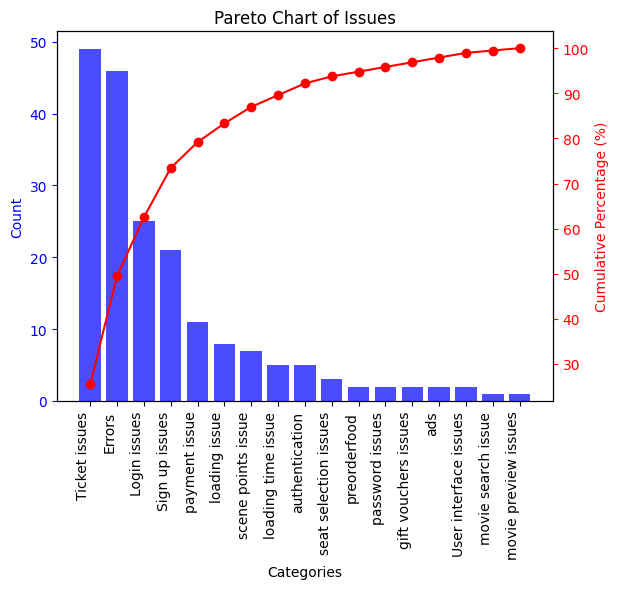

In [94]:
import matplotlib.pyplot as plt
sorted_categories = [x for _, x in sorted(zip(combined_issues.values(), combined_issues.keys()), reverse=True)]
sorted_counts = sorted(combined_issues.values(), reverse=True)
total = sum(combined_issues.values())
cumulative_percentage = [sum(sorted_counts[:i + 1]) / total * 100 for i in range(len(sorted_counts))]
fig,ax1 = plt.subplots()

ax1.bar(sorted_categories, sorted_counts, color='b', alpha=0.7, align='center', label='Count')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation=90, ha='right')

ax2 = ax1.twinx()
ax2.plot(sorted_categories, cumulative_percentage, color='r', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')
ax2.tick_params('y', colors='r')

plt.title('Pareto Chart of Issues')
plt.show()